In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
df = pd.read_csv('./datasets/student_scores.csv')

### Analisando o dataset

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.shape

(25, 2)

Text(0,0.5,'Nota')

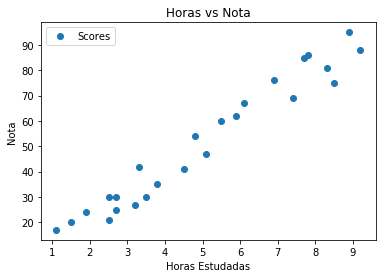

In [6]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Horas vs Nota')  
plt.xlabel('Horas Estudadas')  
plt.ylabel('Nota')   

### Separando dados para teste e treino

In [7]:
# Pegando todas as colunas, com excessão da última
# X = df.iloc[:, :-1].values
X = df.drop('Scores', axis=1)

# Pegando apenas a ultima coluna, neste caso, nossa ultima coluna tem indice 1
y = df.iloc[:, 1].values  

# Separando os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
lm = LinearRegression()

In [9]:
model = lm.fit(X_train, y_train)

### Ponto de interceptação

In [10]:
print(model.intercept_)

1.9322042531516601


### Coeficientes

In [11]:
data = {
    'Coeficientes': X.columns,
    'Relação Prevista': model.coef_
}

df_coefs = pd.DataFrame(data)
df_coefs

,Coeficientes,Relação Prevista
0,Hours,9.941678


    - Segundo o modelo, 1 hora estudada, aumenta em aproximadamente 10 a nota do aluno.

### Prevendo Valores

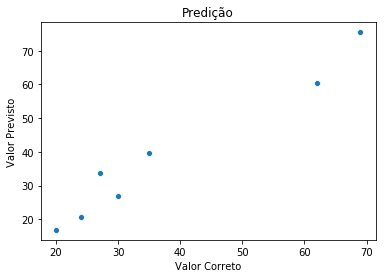

In [12]:
y_pred = model.predict(X_test) 

plt.xlabel('Valor Correto')
plt.ylabel('Valor Previsto')
plt.title('Predição')

sns.scatterplot(y_test, y_pred)

### Visualizando metricas

In [13]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 4.130879918502482
Mean Squared Error: 20.33292367497996
Root Mean Squared Error: 4.509204328368805


### SCORE

In [14]:
print('A acuracidade do modelo foi de: {:.2f}%'.format(lm.score(X_test, y_test) * 100))

A acuracidade do modelo foi de: 93.68%


### Previsão para 10 horas de estudos e para 3.5 Horas

In [15]:
data = {
    'Hours': [10, 3.5],
    'Nota': ['?', '?']
}

df_predicao = pd.DataFrame(data)
notas = model.predict(df_predicao.drop('Nota', axis=1)) 

for i in range(0,2):
    print('Nota prevista para {} horas de estudos: {:.2f}'.format(data['Hours'][i], notas[i]))

Nota prevista para 10 horas de estudos: 101.35
Nota prevista para 3.5 horas de estudos: 36.73


    - Bate aproximadamente com nosso coeficiente de angulação da reta, aonde cada 1 hora estudada, aumenta em cerca de 10 pontos na nota. 10 x 10 = 100